In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [9]:
def get_τ_posterior(dirr,country_name,fromm):
    import numpy as np
    file_name = '{}/{}.npz'.format(dirr,country_name)
    data = np.load(file_name)
    chain = data['chain']
    var_names = list(data['var_names'])

    ind = var_names.index('τ')
    ndays = len(data['incidences'])
    sample = chain[:, fromm:, :].reshape(-1, len(var_names))

    τ_posterior = sample[:,ind].astype(int)
    return τ_posterior,ndays

def plot_for(dir1,dir2,fromm1, fromm2, country_name):
    fig, ax = plt.subplots()
    
    a,na = get_τ_posterior(dir1,country_name, fromm1)
    b,nb = get_τ_posterior(dir2,country_name, fromm2)
    minn = min(a.min(),b.min())
    maxx = max(a.max(),b.max())
    plt.hist(a, bins=np.arange(na), density=True, color='k', align='left', width=1);
    plt.hist(b, bins=np.arange(nb), density=True, color='blue', align='left', width=1,alpha=0.5);
    plt.xlim(minn,maxx)
    plt.title(country_name)
    plt.xlabel("τ")
    plt.ylabel(r"posterior density");
    plt.show();
    fig.savefig('{}/figures/compare_posteriors/{}_compare.pdf'.format('./7M', country_name))

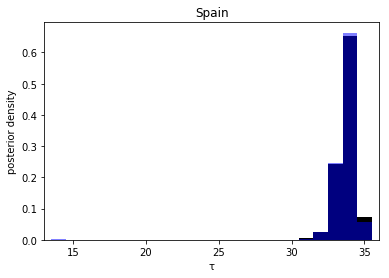

CPU times: user 1min 8s, sys: 13.7 s, total: 1min 22s
Wall time: 1min 22s


In [10]:
%%time
plot_for('./2Mseed1234/inference','./7M/inference',int(1e6),int(6e6),'Spain')

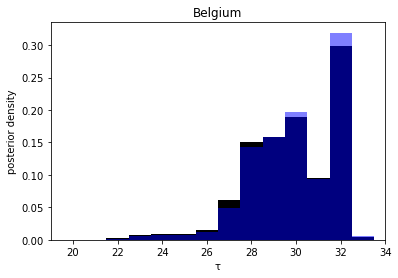

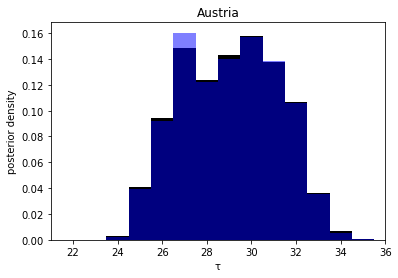

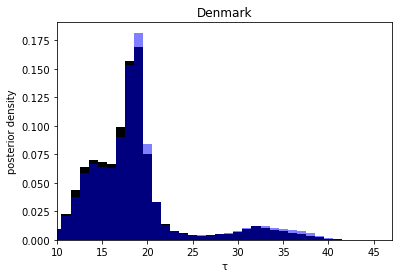

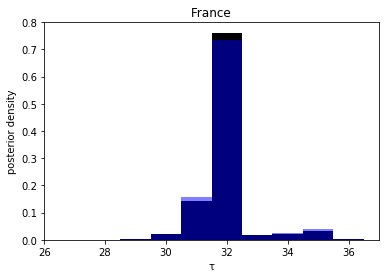

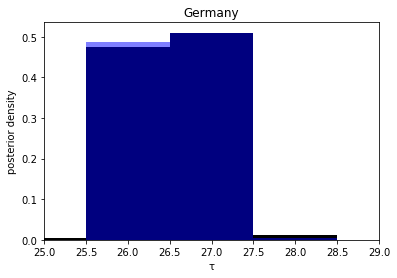

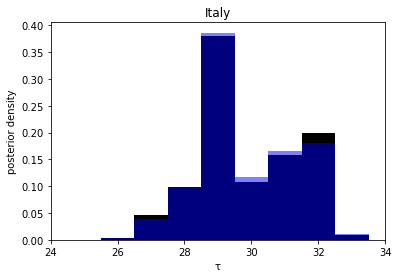

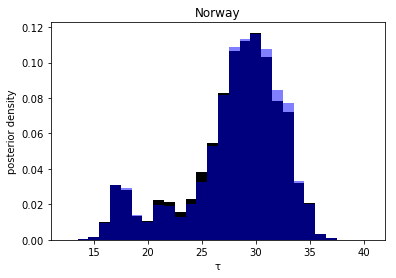

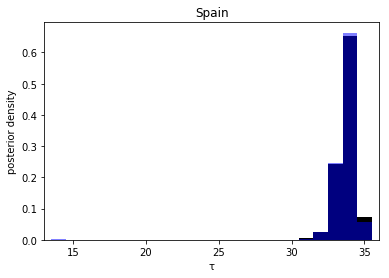

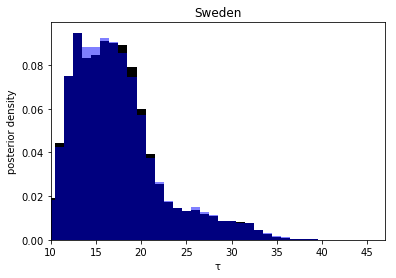

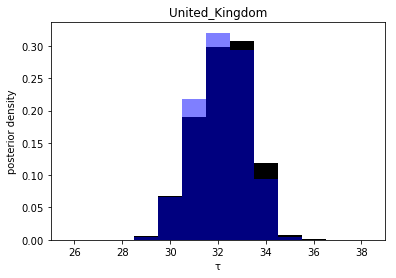

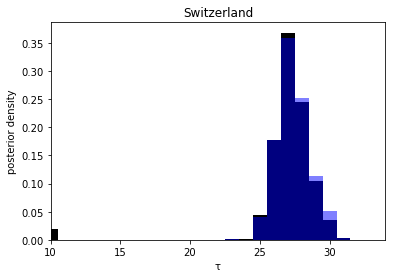

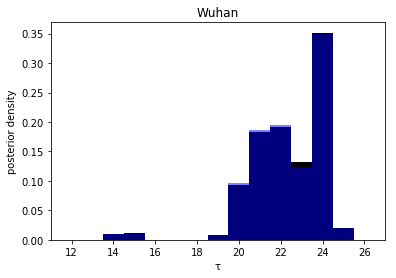

CPU times: user 14min 15s, sys: 3min 27s, total: 17min 43s
Wall time: 17min 37s


In [11]:
%%time

for c in ['Belgium','Austria','Denmark','France','Germany','Italy','Norway','Spain','Sweden','United_Kingdom','Switzerland','Wuhan']:
    plot_for('./2Mseed1234/inference','./7M/inference',int(1e6),int(6e6),c)